### Imports

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

### Data preprocessing

In [5]:
# Load training data
data_train = pd.read_csv('pendigits.csv')

print(data_train)

       input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0          47     100      27      81      57      37      26       0       0   
1           0      89      27     100      42      75      29      45      15   
2           0      57      31      68      72      90     100     100      76   
3           0     100       7      92       5      68      19      45      86   
4           0      67      49      83     100     100      81      80      60   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10987      36     100      24      70       0      38      49      33      95   
10988      16      75      41     100      52      64      32      27       0   
10989      56     100      27      79       0      39      12       0      66   
10990      19     100       0      61       3      23      48       0      97   
10991      38     100      37      81      12      55       0      28      52   

       input10  input11  in

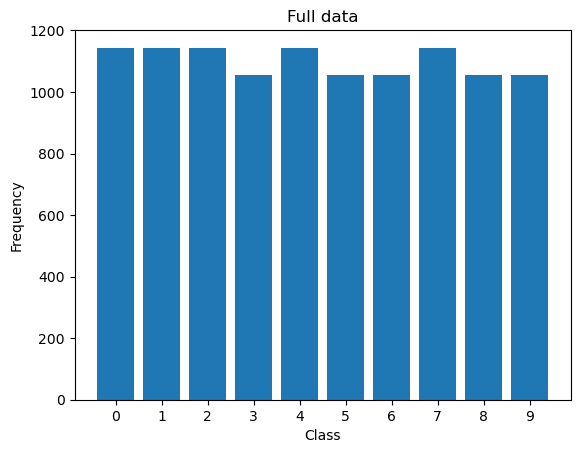

In [13]:
# extract frequency of each class
class_freq = data_train['class'].value_counts()
class_freq = list(class_freq.sort_index())

nb_classes = len(class_freq)
nb_features = data_train.shape[1]-1

# Visual data
graph = plt.bar(list(range(nb_classes)), class_freq)
plt.xticks(list(range(nb_classes)))
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.title('Full data')

plt.show() # balanced data set

In [14]:
# Preprocess data for training

# Convert pandas dataframe to array
data_train_array = data_train.values

# Split x (features) and y (targets)
x_array = data_train_array[:, :nb_features]
y_array = data_train_array[:, nb_features]

# Tensorify
X = torch.tensor(x_array, dtype=torch.float)
Y = torch.tensor(y_array, dtype=torch.long)

print(X.shape)

torch.Size([10992, 16])


### Network Setup

In [24]:
# INPUT/OUTPUT layer sizes
INPUT_NEURONS = nb_features
OUTPUT_NEURONS = nb_classes

In [28]:
# Network architectures: 1 hidden layer

# Layer sizes
hidden_neurons_range = [12] # hidden layer

# Activation functions
# Normal network with sigmoid: 1 hidden layer
def create_standard_sigmoid_network_2layers(hidden_neurons):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_neurons, OUTPUT_NEURONS)
    )

# Normal network with relu: 1 hidden layer
def create_standard_relu_network_2layers(hidden_neurons):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_neurons, OUTPUT_NEURONS)
    )

network_funs_2layers = [
    ("standard_sigmoid_2layers", create_standard_sigmoid_network_2layers),
    ("standard_relu_2layers", create_standard_relu_network_2layers),
]

In [29]:
# Network architectures: 2 hidden layers

# Layer sizes
hidden_neurons_range_1 = [20] # hidden layer 1
hidden_neurons_range_2 = [12] # hidden layer 2

# Activation functions
# Normal network with sigmoid: 2 hidden layers
def create_standard_sigmoid_network_3layers(hidden_neurons_1, hidden_neurons_2):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons_1),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_neurons_1, hidden_neurons_2),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_neurons_2, OUTPUT_NEURONS)
    )

# Normal network with relu: 2 hidden layers
def create_standard_relu_network_3layers(hidden_neurons_1, hidden_neurons_2):
    return torch.nn.Sequential(
        torch.nn.Linear(INPUT_NEURONS, hidden_neurons_1),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_neurons_1, hidden_neurons_2),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_neurons_2, OUTPUT_NEURONS)
    )

network_funs_3layers = [
    ("standard_sigmoid_3layers", create_standard_sigmoid_network_3layers),
    ("standard_relu_3layers", create_standard_relu_network_3layers),
]

### Train and Plot Losses

In [38]:
# Training hyperparameters
# Training constants
lr_range = [rate for rate in np.logspace(-4,-2,num=2,base=10.0)]
NUM_EPOCH = 1000 # could be hyperparam too

# Loss function -> could be hyperparam too
loss_func = torch.nn.CrossEntropyLoss()

Network: standard_sigmoid_2layers, HIDDEN_NEURONS: 12, LR: 0.0001 
Epoch [1 / 1000] Loss: 2.3463  Accuracy: 10.96 %
Epoch [51 / 1000] Loss: 2.3436  Accuracy: 11.04 %
Epoch [101 / 1000] Loss: 2.3407  Accuracy: 11.21 %
Epoch [151 / 1000] Loss: 2.3377  Accuracy: 11.31 %
Epoch [201 / 1000] Loss: 2.3346  Accuracy: 11.41 %
Epoch [251 / 1000] Loss: 2.3315  Accuracy: 11.53 %
Epoch [301 / 1000] Loss: 2.3283  Accuracy: 11.48 %
Epoch [351 / 1000] Loss: 2.3252  Accuracy: 11.55 %
Epoch [401 / 1000] Loss: 2.3222  Accuracy: 11.89 %
Epoch [451 / 1000] Loss: 2.3193  Accuracy: 12.13 %
Epoch [501 / 1000] Loss: 2.3164  Accuracy: 12.38 %
Epoch [551 / 1000] Loss: 2.3136  Accuracy: 12.76 %
Epoch [601 / 1000] Loss: 2.3109  Accuracy: 13.02 %
Epoch [651 / 1000] Loss: 2.3083  Accuracy: 13.34 %
Epoch [701 / 1000] Loss: 2.3057  Accuracy: 13.48 %
Epoch [751 / 1000] Loss: 2.3032  Accuracy: 13.80 %
Epoch [801 / 1000] Loss: 2.3007  Accuracy: 14.11 %
Epoch [851 / 1000] Loss: 2.2983  Accuracy: 14.40 %
Epoch [901 / 1000]

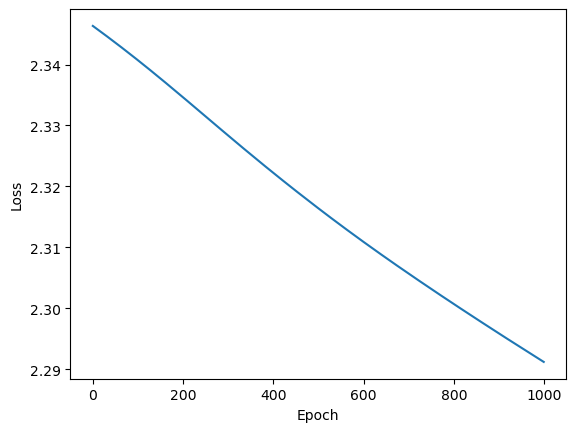

Network: standard_sigmoid_2layers, HIDDEN_NEURONS: 12, LR: 0.01 
Epoch [1 / 1000] Loss: 2.3912  Accuracy: 4.65 %
Epoch [51 / 1000] Loss: 2.2433  Accuracy: 16.70 %
Epoch [101 / 1000] Loss: 2.1723  Accuracy: 24.13 %
Epoch [151 / 1000] Loss: 2.1117  Accuracy: 40.78 %
Epoch [201 / 1000] Loss: 2.0473  Accuracy: 43.67 %
Epoch [251 / 1000] Loss: 1.9826  Accuracy: 46.42 %
Epoch [301 / 1000] Loss: 1.9224  Accuracy: 49.12 %
Epoch [351 / 1000] Loss: 1.8624  Accuracy: 55.09 %
Epoch [401 / 1000] Loss: 1.8033  Accuracy: 58.73 %
Epoch [451 / 1000] Loss: 1.7509  Accuracy: 61.34 %
Epoch [501 / 1000] Loss: 1.7031  Accuracy: 71.58 %
Epoch [551 / 1000] Loss: 1.6591  Accuracy: 73.17 %
Epoch [601 / 1000] Loss: 1.6171  Accuracy: 74.69 %
Epoch [651 / 1000] Loss: 1.5747  Accuracy: 76.08 %
Epoch [701 / 1000] Loss: 1.5268  Accuracy: 77.07 %
Epoch [751 / 1000] Loss: 1.4810  Accuracy: 77.96 %
Epoch [801 / 1000] Loss: 1.4414  Accuracy: 78.51 %
Epoch [851 / 1000] Loss: 1.4046  Accuracy: 79.09 %
Epoch [901 / 1000] Lo

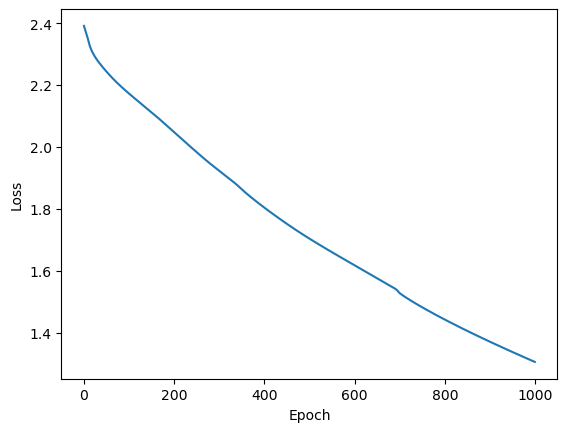

Network: standard_relu_2layers, HIDDEN_NEURONS: 12, LR: 0.0001 
Epoch [1 / 1000] Loss: 33.0733  Accuracy: 10.34 %
Epoch [51 / 1000] Loss: 11.3238  Accuracy: 11.72 %
Epoch [101 / 1000] Loss: 7.1175  Accuracy: 12.60 %
Epoch [151 / 1000] Loss: 5.4923  Accuracy: 14.47 %
Epoch [201 / 1000] Loss: 4.4651  Accuracy: 16.63 %
Epoch [251 / 1000] Loss: 3.7275  Accuracy: 20.90 %
Epoch [301 / 1000] Loss: 3.1853  Accuracy: 25.94 %
Epoch [351 / 1000] Loss: 2.7851  Accuracy: 30.80 %
Epoch [401 / 1000] Loss: 2.4865  Accuracy: 34.47 %
Epoch [451 / 1000] Loss: 2.2602  Accuracy: 37.90 %
Epoch [501 / 1000] Loss: 2.0843  Accuracy: 40.26 %
Epoch [551 / 1000] Loss: 1.9432  Accuracy: 42.55 %
Epoch [601 / 1000] Loss: 1.8268  Accuracy: 44.63 %
Epoch [651 / 1000] Loss: 1.7292  Accuracy: 46.63 %
Epoch [701 / 1000] Loss: 1.6462  Accuracy: 48.78 %
Epoch [751 / 1000] Loss: 1.5749  Accuracy: 50.68 %
Epoch [801 / 1000] Loss: 1.5126  Accuracy: 52.17 %
Epoch [851 / 1000] Loss: 1.4578  Accuracy: 53.63 %
Epoch [901 / 1000] 

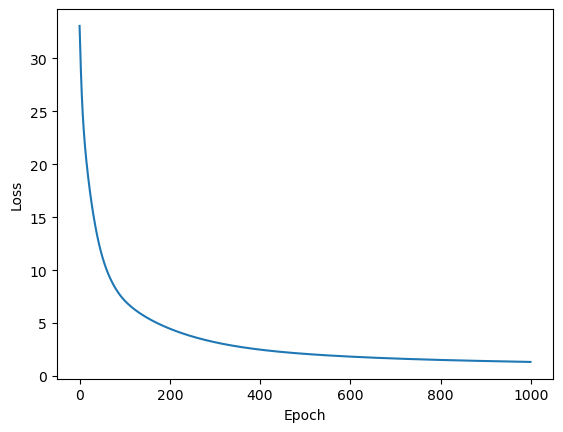

Network: standard_relu_2layers, HIDDEN_NEURONS: 12, LR: 0.01 
Epoch [1 / 1000] Loss: 12.6592  Accuracy: 16.00 %
Epoch [51 / 1000] Loss: 1.0358  Accuracy: 70.76 %
Epoch [101 / 1000] Loss: 0.8103  Accuracy: 73.34 %
Epoch [151 / 1000] Loss: 0.6636  Accuracy: 75.99 %
Epoch [201 / 1000] Loss: 0.4901  Accuracy: 84.40 %
Epoch [251 / 1000] Loss: 0.4308  Accuracy: 85.82 %
Epoch [301 / 1000] Loss: 0.3654  Accuracy: 87.95 %
Epoch [351 / 1000] Loss: 0.3332  Accuracy: 88.99 %
Epoch [401 / 1000] Loss: 0.3075  Accuracy: 89.79 %
Epoch [451 / 1000] Loss: 0.2867  Accuracy: 90.52 %
Epoch [501 / 1000] Loss: 0.2727  Accuracy: 90.92 %
Epoch [551 / 1000] Loss: 0.2597  Accuracy: 91.36 %
Epoch [601 / 1000] Loss: 0.2491  Accuracy: 91.58 %
Epoch [651 / 1000] Loss: 0.2396  Accuracy: 91.78 %
Epoch [701 / 1000] Loss: 0.2312  Accuracy: 92.07 %
Epoch [751 / 1000] Loss: 0.2230  Accuracy: 92.37 %
Epoch [801 / 1000] Loss: 0.2151  Accuracy: 92.72 %
Epoch [851 / 1000] Loss: 0.2082  Accuracy: 92.99 %
Epoch [901 / 1000] Los

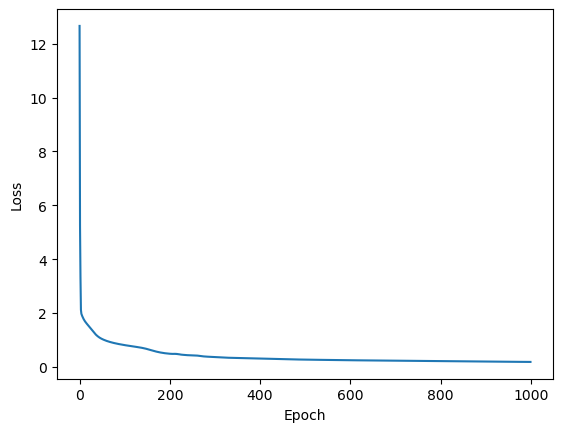

In [39]:
# Train each network and plot the loss: 1 hidden layer networks
for name, network_fun in network_funs_2layers:
    for hidden_neurons in hidden_neurons_range:
        for lr in lr_range:
            print(f"Network: {name}, HIDDEN_NEURONS: {hidden_neurons}, LR: {lr} \n=========")

            # Create new instance of network
            network = network_fun(hidden_neurons)

            # Optimiser
            optimiser = torch.optim.SGD(network.parameters(), lr=lr)

            # store all losses for visualisation
            all_losses = []

            # train a neural network
            for epoch in range(NUM_EPOCH):
                # Perform forward pass
                Y_pred = network(X)
                # Compute loss
                loss = loss_func(Y_pred, Y)
                all_losses.append(loss.item())

                # print progress
                if epoch % 50 == 0:
                    # convert three-column predicted Y values to one column for comparison
                    _, predicted = torch.max(torch.nn.functional.softmax(Y_pred,1), 1)
                    # calculate and print accuracy
                    total = predicted.size(0)
                    correct = predicted.data.numpy() == Y.data.numpy()
                    # Print
                    print('Epoch [%d / %d] Loss: %.4f  Accuracy: %.2f %%'
                        % (epoch + 1, NUM_EPOCH, loss.item(), 100 * sum(correct)/total))

                # Clear the gradients before running the backward pass.
                network.zero_grad()
                # Perform backward pass
                loss.backward()
                # Step optimiser
                optimiser.step()

            # Plot
            plt.figure()
            plt.plot(all_losses)
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()

Network: standard_sigmoid_3layers, HIDDEN_NEURONS_1: 20, HIDDEN_NEURONS_2: 12, LR: 0.01 
Epoch [1 / 1000] Loss: 2.3277  Accuracy: 11.70 %
Epoch [51 / 1000] Loss: 2.3114  Accuracy: 12.44 %
Epoch [101 / 1000] Loss: 2.3003  Accuracy: 12.53 %
Epoch [151 / 1000] Loss: 2.2927  Accuracy: 13.18 %
Epoch [201 / 1000] Loss: 2.2869  Accuracy: 14.79 %
Epoch [251 / 1000] Loss: 2.2823  Accuracy: 16.06 %
Epoch [301 / 1000] Loss: 2.2785  Accuracy: 17.44 %
Epoch [351 / 1000] Loss: 2.2751  Accuracy: 18.25 %
Epoch [401 / 1000] Loss: 2.2719  Accuracy: 19.80 %
Epoch [451 / 1000] Loss: 2.2683  Accuracy: 22.54 %
Epoch [501 / 1000] Loss: 2.2648  Accuracy: 24.93 %
Epoch [551 / 1000] Loss: 2.2616  Accuracy: 26.98 %
Epoch [601 / 1000] Loss: 2.2584  Accuracy: 28.23 %
Epoch [651 / 1000] Loss: 2.2551  Accuracy: 29.23 %
Epoch [701 / 1000] Loss: 2.2517  Accuracy: 30.76 %
Epoch [751 / 1000] Loss: 2.2482  Accuracy: 31.55 %
Epoch [801 / 1000] Loss: 2.2445  Accuracy: 32.68 %
Epoch [851 / 1000] Loss: 2.2406  Accuracy: 34.0

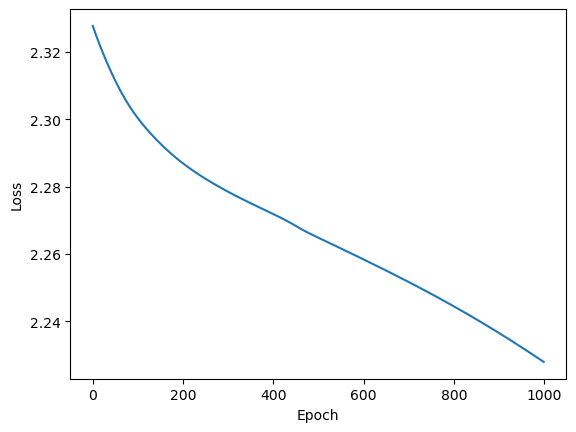

Network: standard_sigmoid_3layers, HIDDEN_NEURONS_1: 20, HIDDEN_NEURONS_2: 12, LR: 0.1 
Epoch [1 / 1000] Loss: 2.4138  Accuracy: 9.66 %
Epoch [51 / 1000] Loss: 2.2692  Accuracy: 19.73 %
Epoch [101 / 1000] Loss: 2.2313  Accuracy: 27.44 %
Epoch [151 / 1000] Loss: 2.1768  Accuracy: 33.47 %
Epoch [201 / 1000] Loss: 2.0996  Accuracy: 38.99 %
Epoch [251 / 1000] Loss: 1.9923  Accuracy: 38.55 %
Epoch [301 / 1000] Loss: 1.8704  Accuracy: 46.21 %
Epoch [351 / 1000] Loss: 1.7490  Accuracy: 53.18 %
Epoch [401 / 1000] Loss: 1.6358  Accuracy: 58.97 %
Epoch [451 / 1000] Loss: 1.5329  Accuracy: 63.23 %
Epoch [501 / 1000] Loss: 1.4449  Accuracy: 64.03 %
Epoch [551 / 1000] Loss: 1.3627  Accuracy: 64.25 %
Epoch [601 / 1000] Loss: 1.2921  Accuracy: 68.48 %
Epoch [651 / 1000] Loss: 1.2292  Accuracy: 69.24 %
Epoch [701 / 1000] Loss: 1.1706  Accuracy: 69.78 %
Epoch [751 / 1000] Loss: 1.1219  Accuracy: 70.06 %
Epoch [801 / 1000] Loss: 1.0634  Accuracy: 70.61 %
Epoch [851 / 1000] Loss: 1.0299  Accuracy: 70.96 

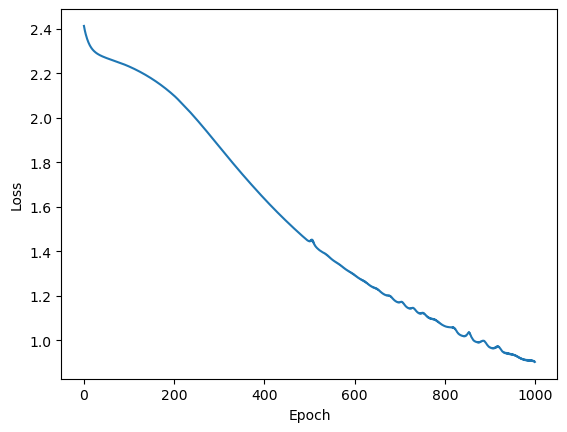

Network: standard_relu_3layers, HIDDEN_NEURONS_1: 20, HIDDEN_NEURONS_2: 12, LR: 0.01 
Epoch [1 / 1000] Loss: 5.5174  Accuracy: 11.54 %
Epoch [51 / 1000] Loss: 1.4543  Accuracy: 45.71 %
Epoch [101 / 1000] Loss: 0.6351  Accuracy: 79.17 %
Epoch [151 / 1000] Loss: 0.4434  Accuracy: 86.05 %
Epoch [201 / 1000] Loss: 0.3912  Accuracy: 87.09 %
Epoch [251 / 1000] Loss: 0.3040  Accuracy: 90.27 %
Epoch [301 / 1000] Loss: 0.2632  Accuracy: 91.78 %
Epoch [351 / 1000] Loss: 0.2262  Accuracy: 93.20 %
Epoch [401 / 1000] Loss: 0.2107  Accuracy: 93.64 %
Epoch [451 / 1000] Loss: 0.1791  Accuracy: 95.05 %
Epoch [501 / 1000] Loss: 0.1593  Accuracy: 95.80 %
Epoch [551 / 1000] Loss: 0.1498  Accuracy: 96.06 %
Epoch [601 / 1000] Loss: 0.1306  Accuracy: 96.76 %
Epoch [651 / 1000] Loss: 0.1268  Accuracy: 96.74 %
Epoch [701 / 1000] Loss: 0.1100  Accuracy: 97.20 %
Epoch [751 / 1000] Loss: 0.1035  Accuracy: 97.41 %
Epoch [801 / 1000] Loss: 0.1552  Accuracy: 95.04 %
Epoch [851 / 1000] Loss: 0.0983  Accuracy: 97.53 %

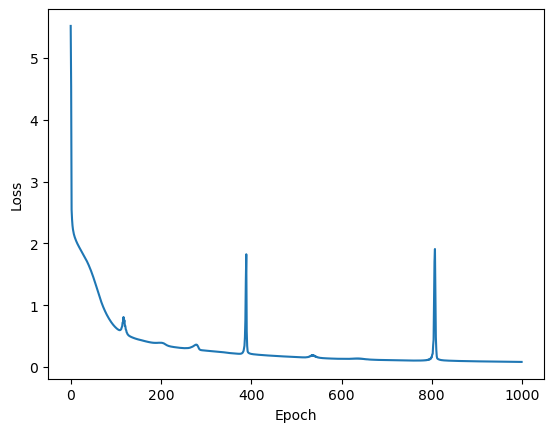

Network: standard_relu_3layers, HIDDEN_NEURONS_1: 20, HIDDEN_NEURONS_2: 12, LR: 0.1 
Epoch [1 / 1000] Loss: 11.1453  Accuracy: 10.39 %
Epoch [51 / 1000] Loss: 2.0022  Accuracy: 20.57 %
Epoch [101 / 1000] Loss: 1.9375  Accuracy: 20.60 %
Epoch [151 / 1000] Loss: 1.9161  Accuracy: 19.44 %
Epoch [201 / 1000] Loss: 1.8196  Accuracy: 23.73 %
Epoch [251 / 1000] Loss: 1.7876  Accuracy: 22.61 %
Epoch [301 / 1000] Loss: 2.5611  Accuracy: 10.40 %
Epoch [351 / 1000] Loss: 2.3579  Accuracy: 10.39 %
Epoch [401 / 1000] Loss: 2.3203  Accuracy: 10.39 %
Epoch [451 / 1000] Loss: 2.2755  Accuracy: 11.11 %
Epoch [501 / 1000] Loss: 2.0035  Accuracy: 20.46 %
Epoch [551 / 1000] Loss: 1.9955  Accuracy: 18.73 %
Epoch [601 / 1000] Loss: 1.9183  Accuracy: 22.48 %
Epoch [651 / 1000] Loss: 2.2283  Accuracy: 17.71 %
Epoch [701 / 1000] Loss: 2.1300  Accuracy: 17.79 %
Epoch [751 / 1000] Loss: 2.0491  Accuracy: 17.97 %
Epoch [801 / 1000] Loss: 1.9824  Accuracy: 18.53 %
Epoch [851 / 1000] Loss: 1.9090  Accuracy: 24.63 %

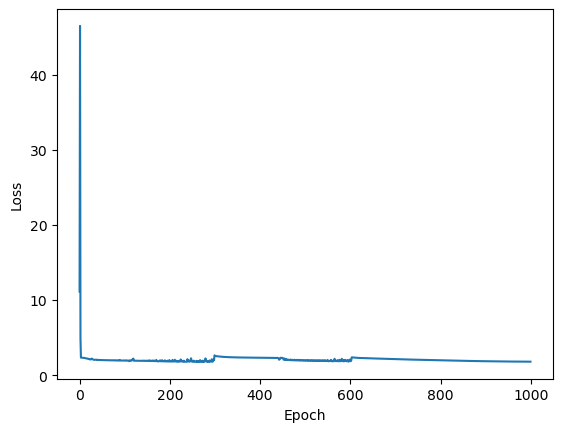

In [37]:
# Train each network and plot the loss: 2 hidden layer networks
for name, network_fun in network_funs_3layers:
    for hidden_neurons_1 in hidden_neurons_range_1:
        for hidden_neurons_2 in hidden_neurons_range_2:
            for lr in lr_range:
                print(f"Network: {name}, HIDDEN_NEURONS_1: {hidden_neurons_1}, HIDDEN_NEURONS_2: {hidden_neurons_2}, LR: {lr} \n=========")

                # Create new instance of network
                network = network_fun(hidden_neurons_1, hidden_neurons_2)

                # Optimiser
                optimiser = torch.optim.SGD(network.parameters(), lr=lr)

                # store all losses for visualisation
                all_losses = []

                # train a neural network
                for epoch in range(NUM_EPOCH):
                    # Perform forward pass
                    Y_pred = network(X)
                    # Compute loss
                    loss = loss_func(Y_pred, Y)
                    all_losses.append(loss.item())

                    # print progress
                    if epoch % 50 == 0:
                        # convert three-column predicted Y values to one column for comparison
                        _, predicted = torch.max(torch.nn.functional.softmax(Y_pred,1), 1)
                        # calculate and print accuracy
                        total = predicted.size(0)
                        correct = predicted.data.numpy() == Y.data.numpy()
                        # Print
                        print('Epoch [%d / %d] Loss: %.4f  Accuracy: %.2f %%'
                            % (epoch + 1, NUM_EPOCH, loss.item(), 100 * sum(correct)/total))

                    # Clear the gradients before running the backward pass.
                    network.zero_grad()
                    # Perform backward pass
                    loss.backward()
                    # Step optimiser
                    optimiser.step()

                # Plot
                plt.figure()
                plt.plot(all_losses)
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.show()